In [19]:
# We'll be analyzing data from these countries
countries = ["United States", "United Kingdom", "China"]

In [20]:
import os

# In practice, you can analyze whatever data you want, as long as it's coming from data.worldbank.org
dataset_names = ["GDP per capita", "population growth rate", "GDP growth rate"]

def datasets(path):
    '''
    Loads all of the available datasets in a given directory.
    '''
    
    for name in os.listdir(path):
        yield csv.reader(open(os.path.join(path, name)))

In [25]:
import csv

# Now, we're actually going to load the data
data = datasets("le_data")

# And parse the data
country_data = {}

# Load entries for each country across each of the available data sets at once
for i, sources in enumerate(zip(*data)):
    # Skip any empty rows
    if len(sources[0]) <= 1:
        continue
    
    # The name of the current country is always stored in the first CSV column
    country = sources[0][0]
    
    if country in countries:
        # We'll want to collect our data from each of the provided datasets
        compiled_data = {}
        
        for j, source in enumerate(sources):
            # There's a bunch of padding by default
            data = source[4:-1]
            fixed_data = []
            
            for k, entry in enumerate(data):
                # Try to fill any gaps in the data
                if entry == "":
                    if k == 0:
                        entry = float(next(filter(lambda x : x != "", data)))
                    else:
                        entry = fixed_data[k - 1]
                else:
                    entry = float(entry)
                    
                fixed_data.append(entry)
                
            compiled_data[dataset_names[j]] = fixed_data
            
        # Make sure we're allocating enough dates to fit the final plot of the data
        compiled_data["year"] = list(range(1960, 1960 + len(compiled_data[dataset_names[0]])))
        
        country_data[sources[0][0]] = compiled_data

In [26]:
import matplotlib.pyplot as plt

In [27]:
%matplotlib inline

<Figure size 1152x648 with 0 Axes>

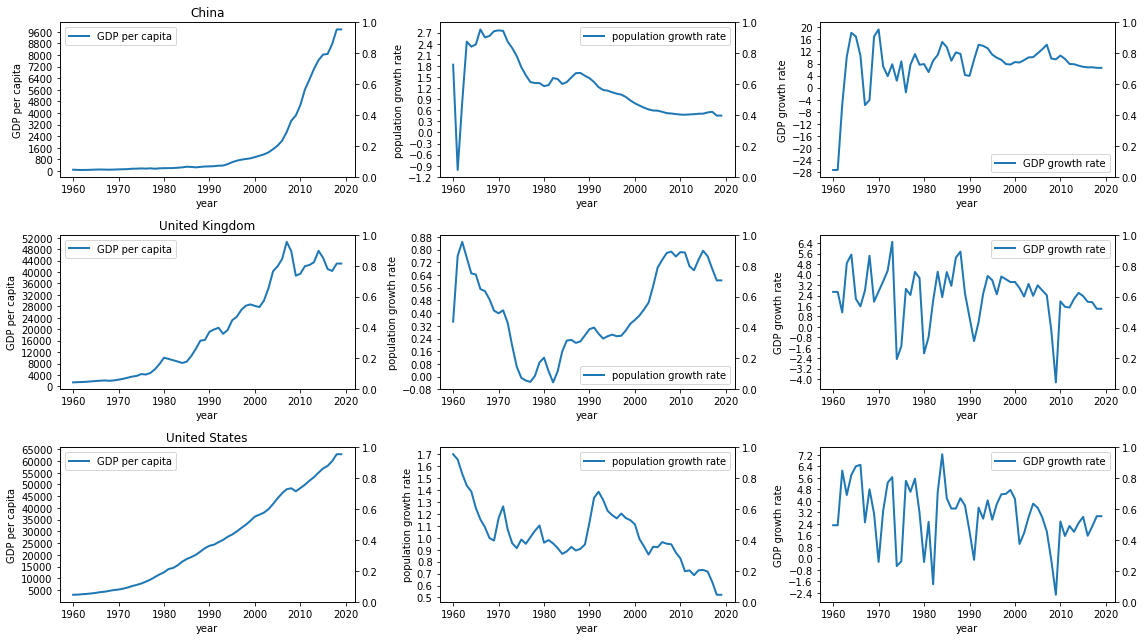

In [37]:
plt.figure(figsize=(16, 9))
plt.rcParams["figure.figsize"] = 16, 9

_, subplots = plt.subplots(len(country_data.keys()), len(country_data[countries[0]].keys()) - 1)

for i, country in enumerate(country_data):
    data = country_data[country]

    for j, (dataset_name, dataset) in enumerate(list(filter(lambda key_value_pair : key_value_pair[0] != "year", data.items()))):
        ax = subplots[i][j]
        ax2 = ax.twinx()

        if j == 0:
            ax.title.set_text(country)
        
        ax.set_xlabel("year")
        ax.set_ylabel(dataset_name)
        ax.yaxis.set_major_locator(plt.MaxNLocator(15))
        ax.plot(data["year"], dataset, marker="", linewidth=2, label=dataset_name)
        
        ax.legend()
plt.tight_layout()
plt.show()